## Práctica5: Redes Neuronales 

Grupo 5: Jorge Ortega y Daniela Vidal

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy

2023-03-15 15:01:45.600087: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-15 15:01:45.800629: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-15 15:01:45.811063: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-15 15:01:45.811083: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not ha

Cargamos los 1000 primeros que son los que nos interesan (0's y 1's)

In [2]:
auxX = np.load('data5/X.npy')
auxY = np.load('data5/y.npy')

X = auxX[0:1000,:]
y = auxY[0:1000]

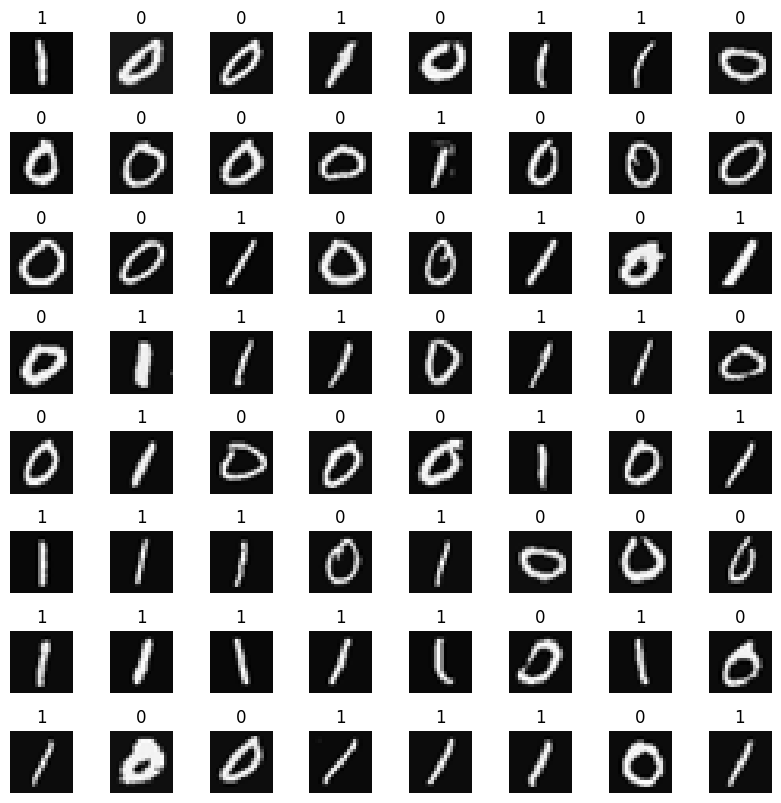

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
       
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()

Creamos el modelo con Tensorflow con 2 capas ocultas de 25 neuronas la primera y 15 neuronas la segunda, con función de activación sigmoide y función de pérdida binary crossentropy.

Entrenamos el modelo con 20 iteraciones.

In [4]:
model = Sequential([Dense(units = 25, activation = 'sigmoid'), Dense(units = 15, activation = 'sigmoid'), Dense(units = 1, activation = 'sigmoid')])
model.compile(loss =BinaryCrossentropy())
model.fit(X, y, epochs = 20)

Epoch 1/20


2023-03-15 15:01:50.520631: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-15 15:01:50.520701: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-15 15:01:50.520731: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-7PVVTK1): /proc/driver/nvidia/version does not exist
2023-03-15 15:01:50.521114: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


32/32 [==============================] - 1s 3ms/step - loss: 0.7963
Epoch 2/20
32/32 [==============================] - 0s 2ms/step - loss: 0.5811
Epoch 3/20
32/32 [==============================] - 0s 3ms/step - loss: 0.4284
Epoch 4/20
32/32 [==============================] - 0s 3ms/step - loss: 0.3122
Epoch 5/20
32/32 [==============================] - 0s 2ms/step - loss: 0.2303
Epoch 6/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1752
Epoch 7/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1358
Epoch 8/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1072
Epoch 9/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0857
Epoch 10/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0696
Epoch 11/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0576
Epoch 12/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0481
Epoch 13/20
32/32 [==============================] - 0s 2ms/

Obtenemos las predicciones y las comparamos con los valores reales. 
Podemos ver que se obtiene un 99.9% de precisión que mejora con más iteraciones de entrenamiento.

In [5]:
# Obtenemos las predicciones
predictions = model.predict(X)

#Vemos la precisión
print("Precision: ", np.sum(np.where(predictions >= 0.5, 1, 0) == y)/ len(y)*100, "%")
print("Erroneos: ", np.sum(np.where(predictions >= 0.5, 1, 0) != y), " de ", len(y))

32/32 [==============================] - 0s 1ms/step
Precision:  99.9 %
Erroneos:  1  de  1000


### Parte 2: Redes Neuronales con Python

In [6]:
def func_sigmoide(z):
    return 1/(1+np.exp(-z))

In [7]:
def my_dense(a, W, b):
    a_sol = func_sigmoide(np.matmul(a, W)+b)
    return a_sol

In [8]:
def my_sequential(x, W1, W2, W3, b1, b2, b3):
    a1 = my_dense(x, W1, b1)
    a2 = my_dense(a1, W2, b2)
    a3 = my_dense(a2, W3, b3)
    return a3

In [9]:
[layer1, layer2, layer3] = model.layers

In [10]:
W1, b1 = layer1.get_weights()
W2, b2 = layer2.get_weights()
W3, b3 = layer3.get_weights()

In [11]:
predictions = my_sequential(X, W1, W2, W3, b1, b2, b3)
print("Precision: ", np.sum(np.where(predictions >= 0.5, 1, 0) == y)/ len(y)*100, "%")
print("Erroneos: ", np.sum(np.where(predictions >= 0.5, 1, 0) != y), " de ", len(y))

Precision:  99.9 %
Erroneos:  1  de  1000
